3.6 with absolute error < 4e-14

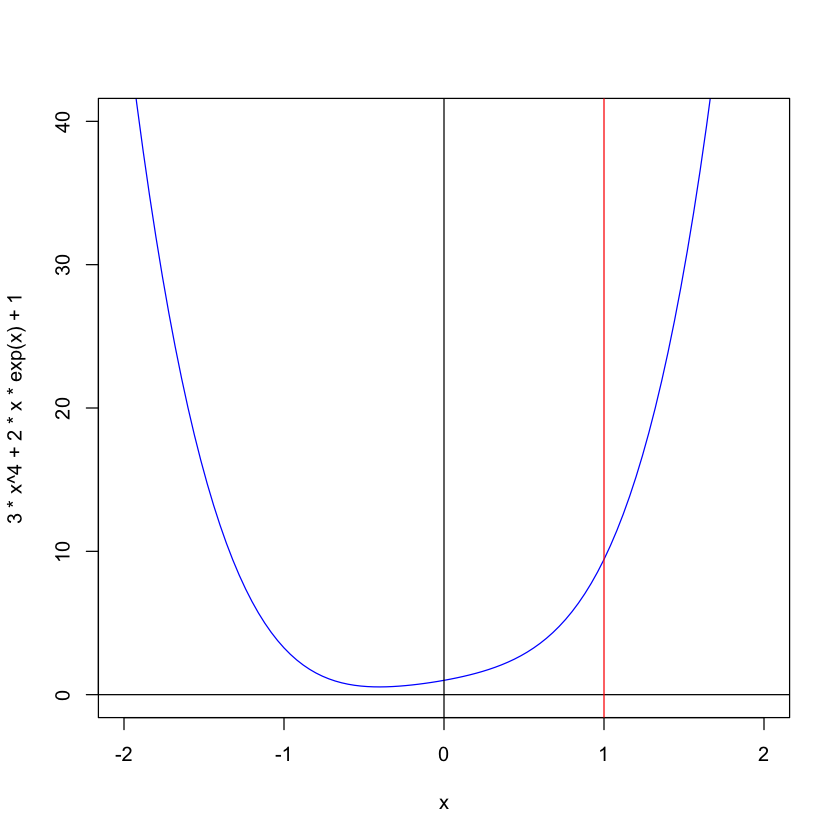

In [1]:
# 1) Compare the following methods of Monte Carlo integration: A) Regular Monte Carlo ; B) Importance Sampling ; C) Stratified Sampling

# First we need to find an example/ an appropriate function to be integrated through different methods:

# First example function: f(x) = 3x^4 + 2x exp(x) + 1

curve(3*x^4 + 2*x*exp(x) + 1 , xlim=c(-2,2), ylim=c(0,40), col="blue")	# plotting the chosen function using built-in function curve()
abline(h=0, col="black")
abline(v=0, col="black")
abline(v=1, col="red")

integrate(function(x){3*x^4 + 2*x*exp(x) + 1}, 0, 1)	# The true value of the integral we are interested in, evaluated over interval (0, 1)

# >> We proceed with this example to perform our simulations, i.e. our function 'f' is : f(x) = 3*x^4 + 2*x*exp(x) +1 and we would like to find its integral over: (0, 1) for example.

[1] 3.092013

[1] 3.577863

[1] 3.602162

3.6 with absolute error < 4e-14

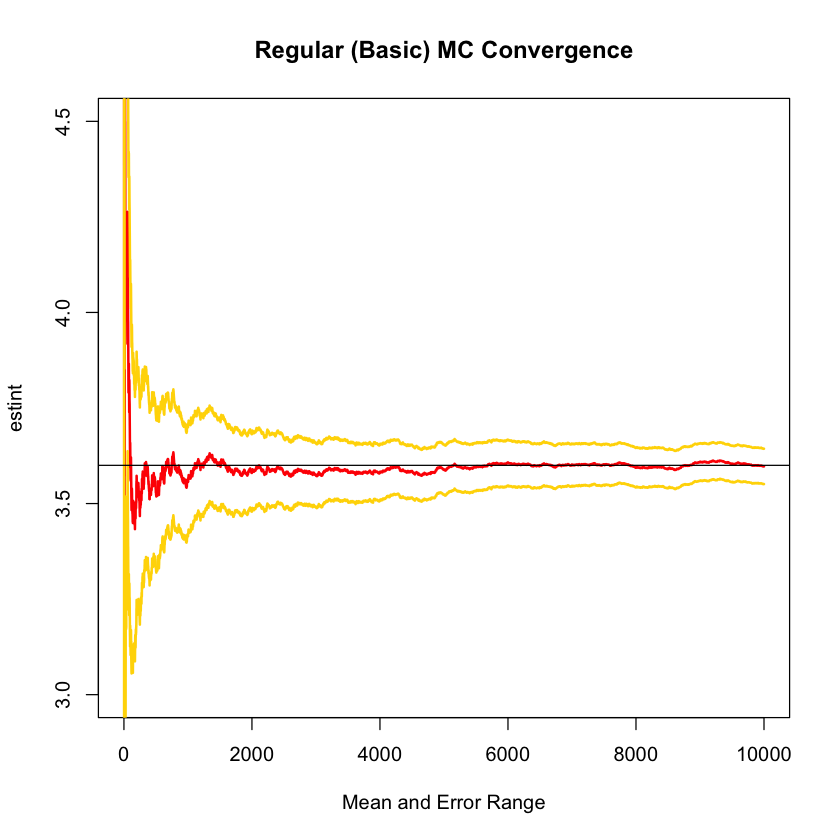

In [2]:
# A) Regular (Basic) Monte Carlo:

# We implement this method as a function, this will help with the simulation study/comparison that comes next:

option_A	<-	function(n){												# The basic/simple MC to convert the integral into an expectation.
	
						z 	<-	1													# our integral's upper bound (or: max - min)
						u	<-	runif(n, min= 0, max= z)				# uniform RVs: u ~ u [0, 1]
						h	<-	 z * (3*u^4+2*u*exp(u)+1)		# this is the function h. NOTE: we need to multiply by upper bound z to convert the expression back to the original integral we are interested in. This is necessary because unifrom RVs are essentially dividing the expression by z and hence the need for multiplying by z to revert it.
						return(mean(h))									# evaluating the expectation to get a value for the integral
						
}

# Checking for different numbers of replications (iterations) n to get an overall picture of the behaviour of this method :
option_A(10^2)															# n = 100
option_A(10^3)															# n = 1,000
option_A(10^6)															# n = 1,000,000	# Note: results get much closer to the true value of integral as n increases

integrate(function(x){3*x^4+2*x*exp(x)+1}, 0, 1)

# We can also check whether the estimates converge to the true value of the integral for a single sequence of simulations:

set.seed(123456)
estint <- rep(0, 10^4)
esterr <- rep(0, 10^4)
z 				<- 1
u				<-	runif(10^4, min= 0, max= z)
hA			<-	 z * (3*u^4+2*u*exp(u)+1)
for (i in 1:10^4){
	estint[i] 	<- sum(hA[1:i]) / (i) 
	esterr[i] 	<- sqrt(sum((hA[1:i]-estint[1:i])^2))  / i 
}

plot(estint, xlab="Mean and Error Range", type="l", lwd=2, col= "red", ylim= c(3,4.5), main="Regular (Basic) MC Convergence")
lines(estint + 2*esterr, col= "gold", lwd=2)
lines(estint - 2*esterr, col="gold", lwd=2)
abline(h=3.6)

# By the 10^4 th simulation this given sequence gets very close to the true value of the integral

[1] 3.33227

[1] 3.439612

[1] 3.605535

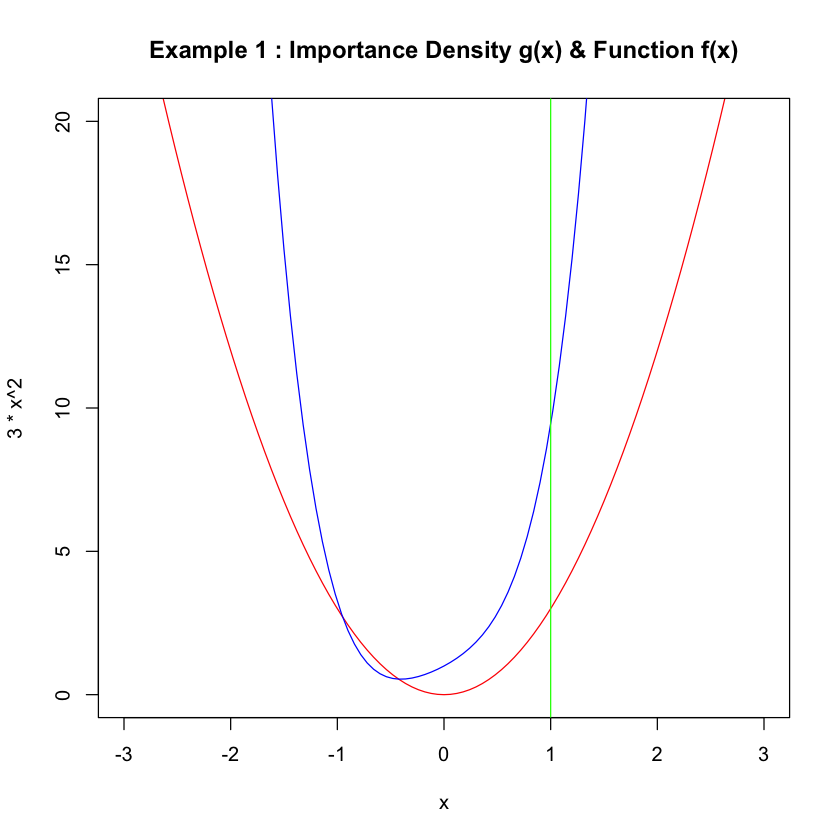

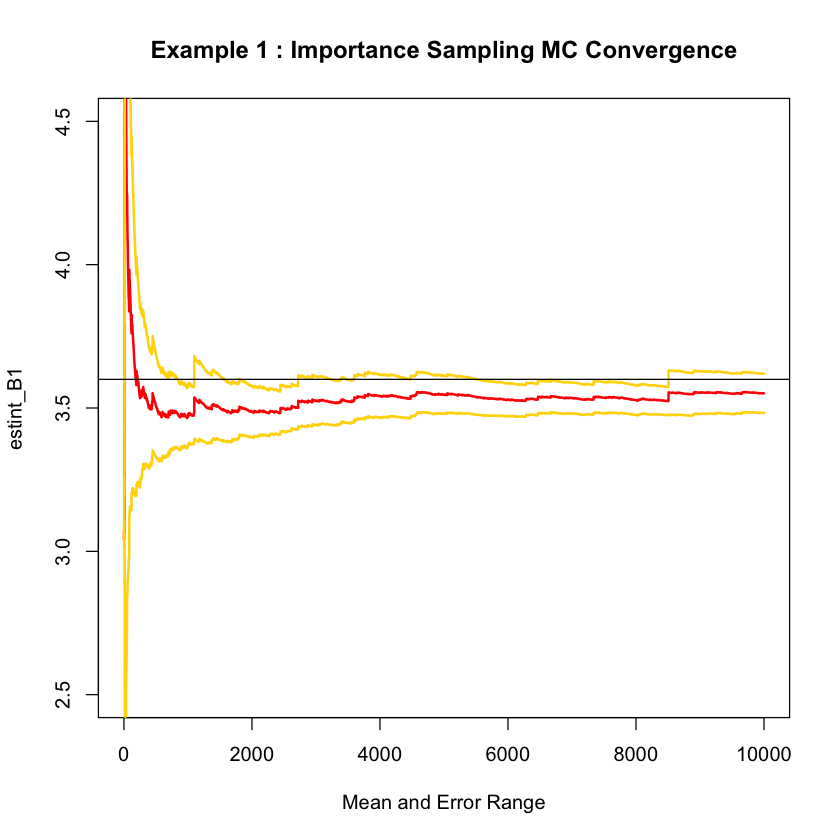

In [3]:
# B) Importance Sampling: hypothetically, we have an infinite number of combinations for the function f and the candidate density g. However, we would like the density to have certain properties that match the function's properties. We take two different importance densities and compare their performance:


# IMPORTANCE DENSITY No 1:

# We propose that g(x) = c * x^2 and evaluate the integral x^2 over [0, 1] to find that c = 3 : 
 # Proceeding with g(x) = 3*x^2 as our importance density and plotting both g and f :
 
curve(3*x^2, xlim=c(-3,3), ylim=c(0,20), col="red", main="Example 1 : Importance Density g(x) & Function f(x)")		# g, the importance (or:instrumental) density
curve(3*x^4 + 2*x*exp(x) + 1 , xlim=c(-3,3), ylim=c(0,20), col="blue", add=T)			# f, the function
abline(v=1, col="green")																										# upper bound of the integral

# 1) According to a rule of thumb, when the function f is large importance density g has to be large too. In other words the candidate density g(x) has to be approximately proportional to the function f(x). This rule holds in the case of g(x) = 3*x^2 and this is desirable.

# 2) In addition, we can see that it has a compatible support with our function h (i.e. g > 0 when h > 0).

# 	>> hence we continue with g(x) = 3*x^2

g_1 		<- function(x) {3*x^2}
f 			<-function(x) {(3*x^4 + 2*x*exp(x) + 1)}	
G_1		<-	function(x) {x^3}													
# Note also that inverse of G(x) is: (x)^(1/3)

gene_1 <- function(n, min, max){		# this function samples from the importance density g(x) by using the Inverse Transform method
  	u 	<- runif(n, 0, 1)
  	y 	<- (G_1(min) + u*(G_1(max)-G_1(min))) ^ (1/3)   	# inverse of G(x) 
  	return(y)
}


option_B1 <- function(n){			# implementing 
	u 	<- runif(n, 0, 1)					# n uniform RVs generated	
	x <- gene_1(n, 0, 1)
	h <- f(x) / g_1(x)
	return(mean(h))						# evaluating the mean of h (a vector) once is equal to one estimate for our integral
}

option_B1(10^2)							# n = 100
option_B1(10^3)							# n = 1,000
option_B1(10^6)							# n = 1,000,000	 Note: results get much closer to the true value of integral as n increases


# Similar to part A, we can check the convergence of a single sequence to the true value of the integral when using this method :

set.seed(12345)
estint_B1 	<- rep(0, 10^4)
esterr_B1		<- rep(0, 10^4)
h1				<-	 gene_1(10^4, 0, 1)				# sampling from g(x) using the previously defined function gene()
h2 				<- f(h1) / g_1(h1)
for (i in 1:10^4){
	estint_B1[i] 	<- sum(h2[1:i]) / (i) 
	esterr_B1[i] 	<- sqrt(sum((h2[1:i]-estint_B1[1:i])^2))  / i 
}

plot(estint_B1, xlab="Mean and Error Range", type="l", lwd=2, col= "red", main="Example 1 : Importance Sampling MC Convergence", ylim=c(2.5,4.5))
lines(estint_B1 + 2*esterr_B1, col= "gold", lwd=2)
lines(estint_B1 - 2*esterr_B1, col="gold", lwd=2)
abline(h=3.6)

# Again, the sequence converges close to the true value as the number of simulations increases

In [4]:
# C) Stratified Sampling:

f 			<-function(x) {(3*x^4 + 2*x*exp(x) + 1)}
h_1  	<-	function(x) {(3*x^4 + 2*x*exp(x) + 1) / (3*x^2)}				# s.t : h = f / g
G_1		<-	function(x) {x^3}

gene_1 <- function(n, min, max){					# this function samples from the importance density g(x) by using the Inverse Transform method
  	u 	<- runif(n, 0, 1)
  	y 	<- (G_1(min) + u*(G_1(max)-G_1(min))) ^ (1/3)   	
  	return(y)
}

In [5]:
# m strata, number of RVs taken on each stratum = ni = n/m --> equal number per stratum

strat_B1  	<-	function(n, m){
  
  res			<-	rep(0, m)
  s				<-	seq(0, 1, length.out=m+1)
  a				<-	diff(G_1(s))	
  for(i in 1:m){
    u			<-	gene_1(n/m, min=s[i], max=s[i+1])
    res[i]	<-	mean(h_1(u))
  }
  return(sum(a*res))
  
}
strat_B1(1000, 10)

[1] 3.597254

In [6]:
# m strata, number of RVs taken on each stratum = ni = n*(a*devs)/sum(a*devs)  --> "proportional allocation"

strat_C1  	<-	function(n, m, B){
  
  devs		<-	rep(0, m)
  s				<-	seq(0, 1, length.out=m+1)	
  
  for(i in 1:m){
    u			<-	gene_1(B, min=s[i], max=s[i+1])
    devs[i]	<-	sd(h_1(u))
  }
  
  a				<-	diff(G_1(s))	
  ens			<-	n*(a*devs)/sum(a*devs)							# "proportional allocation" to each stratum
  ens			<-	round(ens)
  
  res			<-	rep(0, m)
  s				<-	seq(0, 1, length.out=m+1)	
  for(i in 1:m){																# for each stratum do the following...
    u			<-	gene_1(ens[i], min=s[i], max=s[i+1])		# sample according to importance density g (through function gene() defined earlier)
    res[i]	<-	mean(h_1(u))											# evaluate h (x=u) and take their average
  }
  return(sum(a*res))														# evaluating over all strata: our estimate for the integral
  
}
strat_C1(1000, 10, 1000)											# evaluating once to check that it works

[1] 3.609498

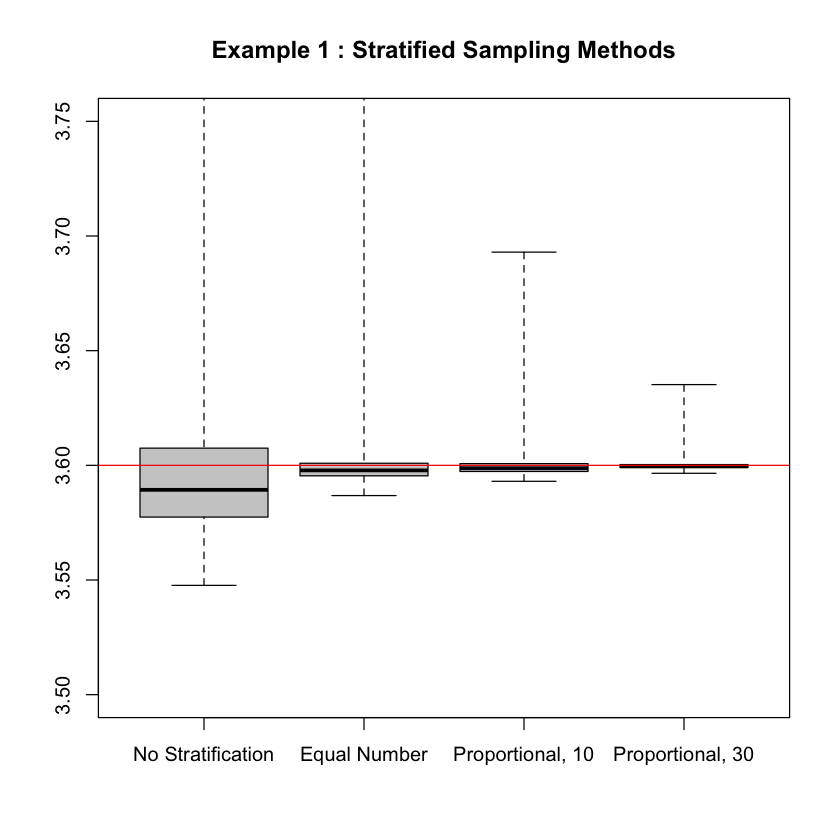

In [7]:
# Comparing the three different stratified sampling methods via a simple simulation study:

set.seed(1234567)									# making results reproducible by using the built-in set.seed() function
B			<-	10^3											# Number of simulations for this study
resA1	<-	rep(0, B)									# containers for three methods
resB1	<-	rep(0, B)
resC1	<- rep(0, B)
resD1	<- rep(0, B)

n		<-	10^5

for(i in 1:B){
	resA1[i]		<- strat_B1(n, 1)									# No stratification (m=1)
	resB1[i]		<- strat_B1(n, m=10)							# 10 strata, equal allocation
	resC1[i] 		<- strat_C1(n, m=10, B=1000)			# 10 strata, proportional allocation
	resD1[i]		<- strat_C1(n, m= 30, B=1000)			# 30 strata, proportional allocation
}

boxplot(resA1, resB1, resC1, resD1, names=c("No Stratification", "Equal Number", "Proportional, 10", "Proportional, 30"), ylim=c(3.5,3.75), col=grey(0.8), range=0, main= "Example 1 : Stratified Sampling Methods")
abline(h=3.6, col="red", lwd=1)		 # the 'true' value of the integral from before

# Conclusion: As expected, the fourth method (30 strata with proportional allocation) is the most accurate of all stratified methods above.

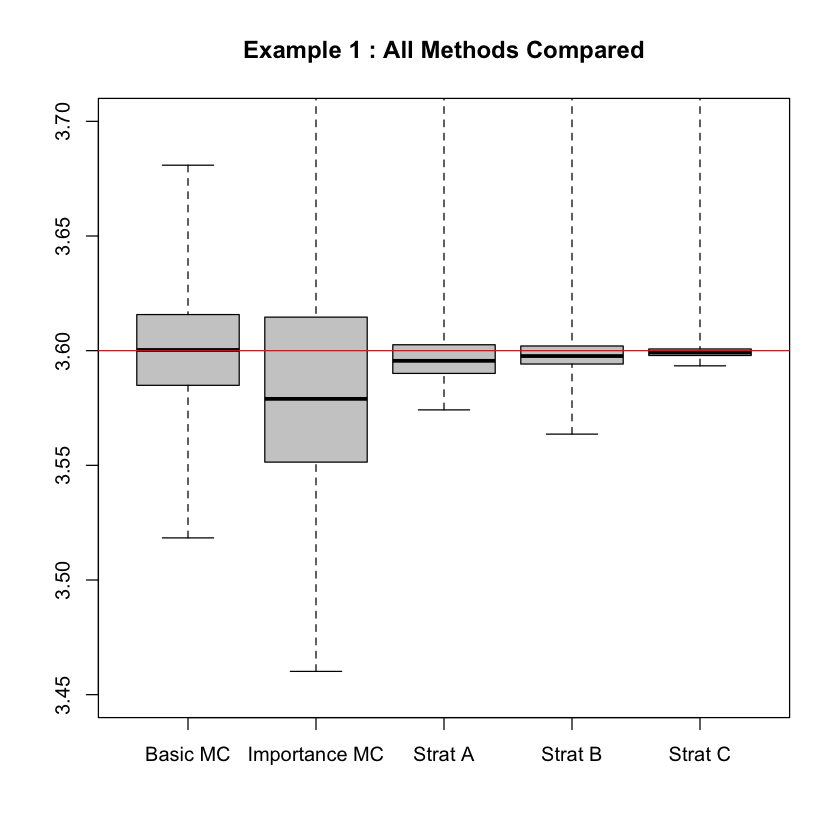

In [8]:
# Simulation Study: we now compare all different methods for this given importance density example:

set.seed(1234567)								# making results reproducible by using set.seed() function
B		<-	10^4											# number of simulations
res1_1	<-	rep(0, B)								# containers
res2_1	<-	rep(0, B)
res3_1	<- rep(0, B)
res4_1	<- rep(0, B)
res5_1	<- rep(0, B)

n		<-	10^4

for(i in 1:B){
	res1_1[i]	<- option_A(n)
	res2_1[i]	<- option_B1(n)
	res3_1[i] 	<- strat_B1(n, m=10)	
	res4_1[i]	<-	strat_C1(n, m=10, B=1000)
	res5_1[i] <- strat_C1(n, m=30, B=1000)
}

boxplot(res1_1, res2_1, res3_1, res4_1, res5_1, names=c("Basic MC", "Importance MC", "Strat A", "Strat B", "Strat C"), ylim=c(3.45,3.7), col=grey(0.8), range=0, main = "Example 1 : All Methods Compared")
abline(h=3.6, col="red", lwd=1)

# Conclusion: The stratified with proportional allocation (optimal) from each stratum and 30 strata is the best method. It has the closest estimate to the true value of the integral as well as having the smallest error margin. Next are the other stratified sampling methods followed by simple monte carlo and importance sampling.

[1] 3.087005

[1] 3.437117

[1] 3.631663

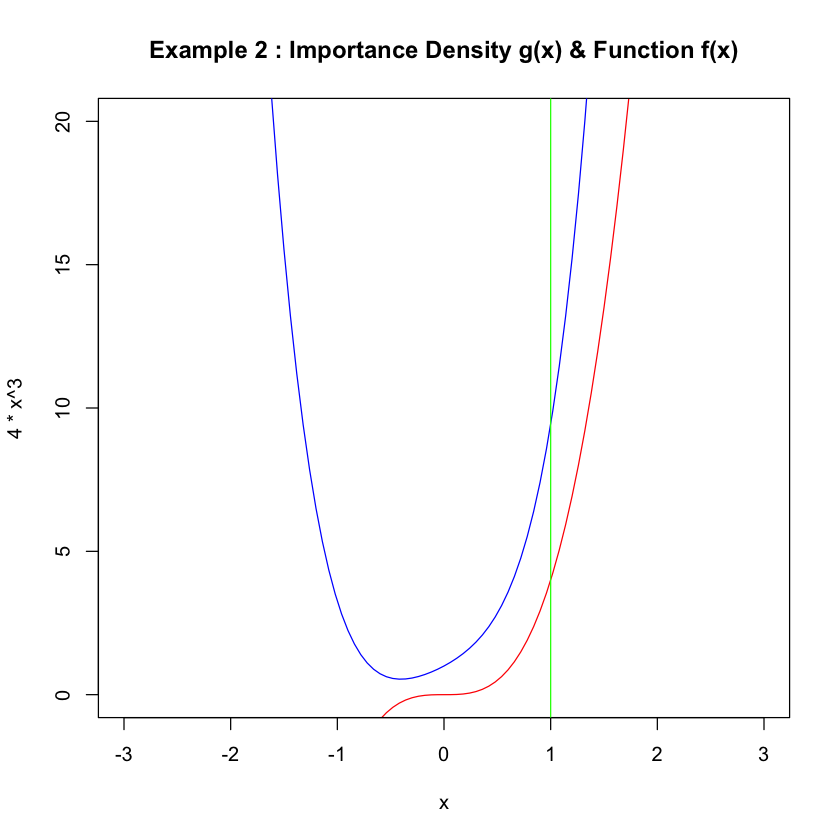

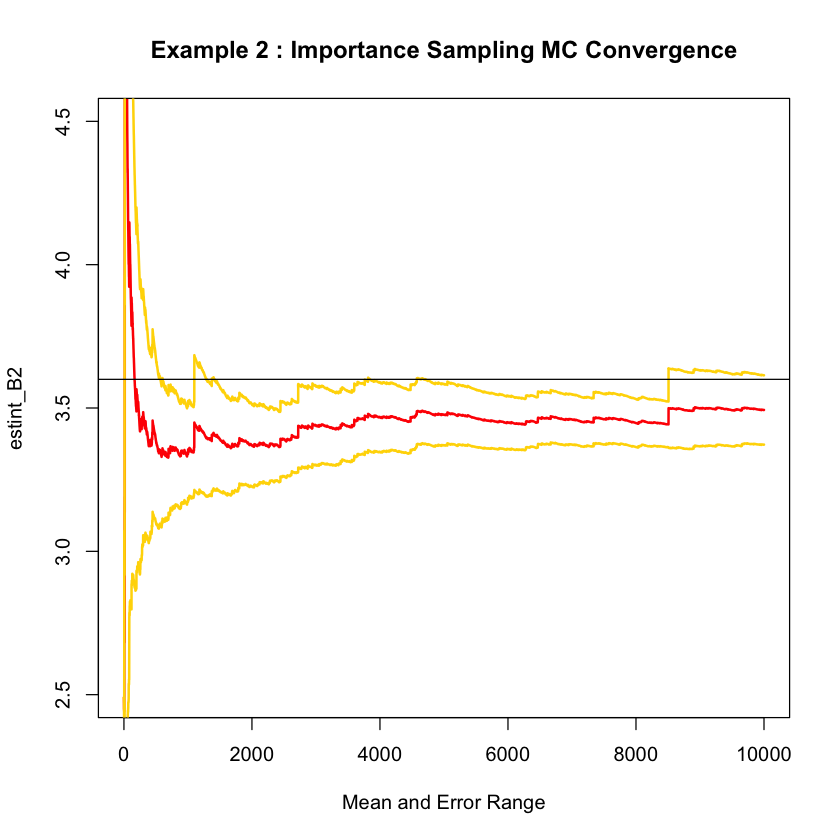

In [9]:
# IMPORTANCE DENSITY No 2:  another importance density:

# We should redo parts B & C as A remains the same (because it does not depend on the candidate importance density).
# We propose that g(x) = c * x^3 and evaluate the integral x^3 over [0, 1] to find that c = 4 : 
 # Proceeding with g(x) =  4*x^3 as our importance density and plotting both g and f :
 
curve(4*x^3, xlim=c(-3,3), ylim=c(0,20), col="red", main="Example 2 : Importance Density g(x) & Function f(x)")	# g, the importance density
curve(3*x^4 + 2*x*exp(x) + 1 , xlim=c(-3,3), ylim=c(0,20), col="blue", add=T)			# f, the function
abline(v=1, col="green")																										# upper bound of the integral

# According to a rule of thumb, when the function f is large importance density g has to be large too. In other words the candidate density g(x) has to be approximately proportional to the function f(x). This rule holds in the case of g(x) =  4*x^3 and this is desirable.

# 	>> hence we continue with g(x) =  4*x^3

g_2 		<- function(x) {4*x^3}
f 			<- function(x) {(3*x^4 + 2*x*exp(x) + 1)}		
G_2 		<- function(x) {x^4}										
# Note also that inverse of G(x) is: (x)^(1/4)

gene_2 <- function(n, min, max){		# this function samples from the importance density g(x) by using the Inverse Transform method
  	u 	<- runif(n, 0, 1)
  	y 	<- (G_2(min) + u*(G_2(max)-G_2(min))) ^ (1/4)   	# inverse of G(x) 
  	return(y)
}


option_B2 <- function(n){			# implementing 
	u 	<- runif(n, 0, 1)					# n uniform RVs generated	
	x <- gene_2(n, 0, 1)
	h <- f(x) / g_2(x)
	return(mean(h))						# evaluating the mean of h (a vector) once is equal to one estimate for our integral
}

option_B2(10^2)							# n = 100
option_B2(10^3)							# n = 1,000
option_B2(10^6)							# n = 1,000,000	 Note: results get much closer to the true value of integral as n increases


# Similar to part A and part B for Example no 1, we can check the convergence of a single sequence to the true value of the integral when using this method :

set.seed(12345)
estint_B2 	<- rep(0, 10^4)
esterr_B2 	<- rep(0, 10^4)
h1				<-	 gene_2(10^4, 0, 1)			# sampling from g(x) using the previously defined function gene()
h2 				<- f(h1) / g_2(h1)
for (i in 1:10^4){
	estint_B2[i] 	<- sum(h2[1:i]) / (i) 
	esterr_B2[i] 	<- sqrt(sum((h2[1:i]-estint_B2[1:i])^2))  / i 
}

plot(estint_B2, xlab="Mean and Error Range", type="l", lwd=2, col= "red", main="Example 2 : Importance Sampling MC Convergence", ylim=c(2.5,4.5))
lines(estint_B2 + 2*esterr_B2, col= "gold", lwd=2)
lines(estint_B2 - 2*esterr_B2, col="gold", lwd=2)
abline(h=3.6)

# Again, the sequence converges close to the true value as the number of simulations increases

In [10]:
# C) Stratified Sampling:

f 			<-function(x) {(3*x^4 + 2*x*exp(x) + 1)}
h_2 		<-	function(x) {(3*x^4 + 2*x*exp(x) + 1) / (4*x^3)}				# s.t : h = f / g
G_2		<-	function(x) {x^4}

gene_2 <- function(n, min, max){							# this function samples from the importance density g(x) by using the Inverse Transform method
  	u 	<- runif(n, 0, 1)
  	y 	<- (G_2(min) + u*(G_2(max)- G_2(min))) ^ (1/4)   	
  	return(y)
}

In [11]:
# m strata, number of RVs taken on each stratum = ni = n/m --> equal number per stratum

strat_B2  	<-	function(n, m){
  
  res			<-	rep(0, m)
  s				<-	seq(0, 1, length.out=m+1)
  a				<-	diff(G_2(s))	
  for(i in 1:m){
    u			<-	gene_2(n/m, min=s[i], max=s[i+1])
    res[i]	<-	mean(h_2(u))
  }
  return(sum(a*res))
  
}
strat_B2(1000, 10)

[1] 3.594957

In [12]:
# m strata, number of RVs taken on each stratum = ni = n*(a*devs)/sum(a*devs)  --> "proportional allocation"

strat_C2  	<-	function(n, m, B){
  
  devs		<-	rep(0, m)
  s				<-	seq(0, 1, length.out=m+1)	
  
  for(i in 1:m){
    u			<-	gene_2(B, min=s[i], max=s[i+1])
    devs[i]	<-	sd(h_2(u))
  }
  
  a				<-	diff(G_2(s))	
  ens			<-	n*(a*devs)/sum(a*devs)							# "proportional allocation" to each stratum
  ens			<-	round(ens)
  
  res			<-	rep(0, m)
  s				<-	seq(0, 1, length.out=m+1)	
  for(i in 1:m){																# for each stratum do the following...
    u			<-	gene_2(ens[i], min=s[i], max=s[i+1])		# sample according to importance density g (through function gene() defined earlier)
    res[i]	<-	mean(h_2(u))											# evaluate h (x=u) and take their average
  }
  return(sum(a*res))														# evaluating over all strata: our estimate for the integral
  
}
strat_C2(1000, 10, 1000)											# evaluating once to check that it works


[1] 3.620734

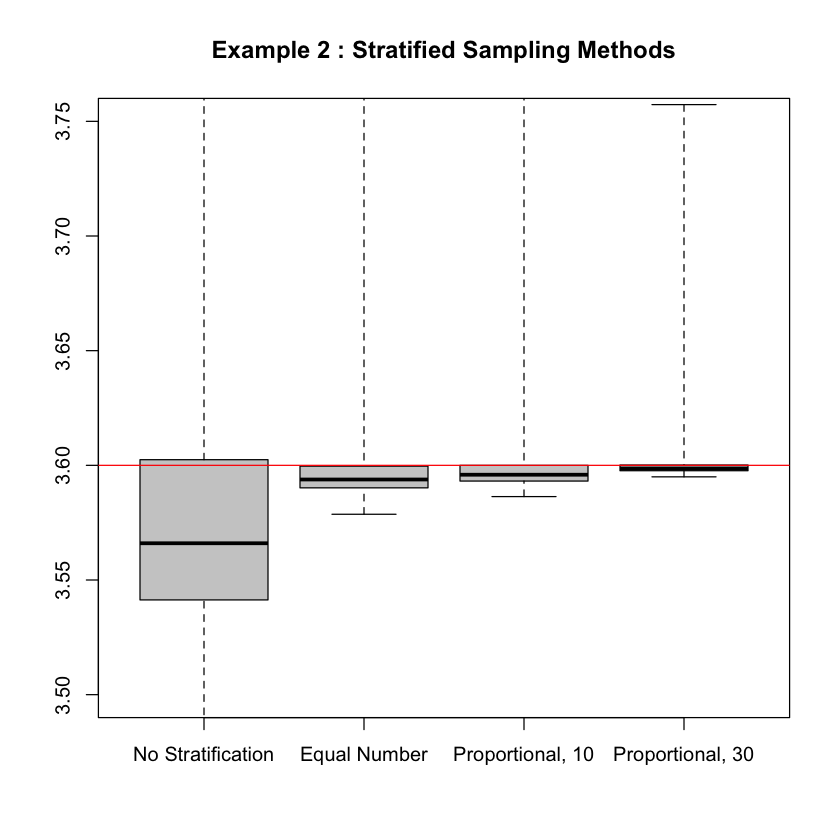

In [13]:
# Comparing the three different stratified sampling methods via a simple simulation study:

set.seed(1234567)										# making results reproducible by using the built-in set.seed() function
B				<-	10^3											# Number of simulations for this study
resA2		<-	rep(0, B)									# containers for three methods
resB2		<-	rep(0, B)
resC2		<- rep(0, B)
resD2		<- rep(0, B)

n		<-	10^5

for(i in 1:B){
	resA2[i]		<- strat_B2(n, 1)									# No stratification (m=1)
	resB2[i]		<- strat_B2(n, m=10)							# 10 strata, equal allocation
	resC2[i] 		<- strat_C2(n, m=10, B=1000)			# 10 strata, proportional allocation
	resD2[i]		<- strat_C2(n, m= 30, B=1000)			# 30 strata, proportional allocation
}

boxplot(resA2, resB2, resC2, resD2, names=c("No Stratification", "Equal Number", "Proportional, 10", "Proportional, 30"), ylim=c(3.5,3.75), col=grey(0.8), range=0, main= "Example 2 : Stratified Sampling Methods")
abline(h=3.6, col="red", lwd=1)		 # the 'true' value of the integral from before

# Conclusion: As expected, the fourth method (30 strata with proportional allocation) is the most accurate of all stratified methods above.

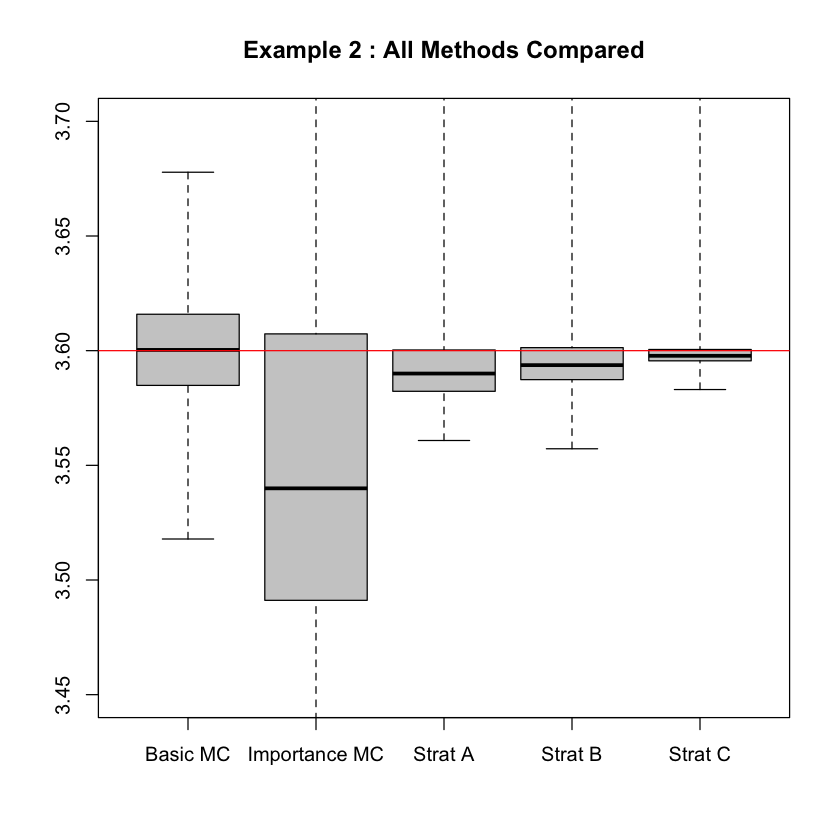

In [14]:
# Simulation Study: we now compare all different methods for this given importance density example:

set.seed(1234567)								# making results reproducible by using set.seed() function
B			<-	10^4										# Number of simulations
res1_2	<-	rep(0, B)								# containers
res2_2	<-	rep(0, B)
res3_2	<- rep(0, B)
res4_2 	<- rep(0, B)
res5_2	<- rep(0, B)

n		<-	10^4

for(i in 1:B){
	res1_2[i]	<- option_A(n)
	res2_2[i]	<- option_B2(n)
	res3_2[i] 	<- strat_B2(n, m=10)	
	res4_2[i]	<-	strat_C2(n, m=10, B=1000)
	res5_2[i] <- strat_C2(n, m=30, B=1000)
}

boxplot(res1_2, res2_2, res3_2, res4_2, res5_2, names=c("Basic MC", "Importance MC", "Strat A", "Strat B", "Strat C"), ylim=c(3.45,3.7), col=grey(0.8), range=0, main = "Example 2 : All Methods Compared")
abline(h=3.6, col="red", lwd=1)

# Conclusion: In this case too, the stratified with proportional allocation (optimal) from each stratum and 30 strata is the best method. It has the closest estimate to the true value of the integral as well as having the smallest error margin. Next are the other stratified sampling methods followed by simple monte carlo and importance sampling. Also note that this importance density does not do as well as the first density.


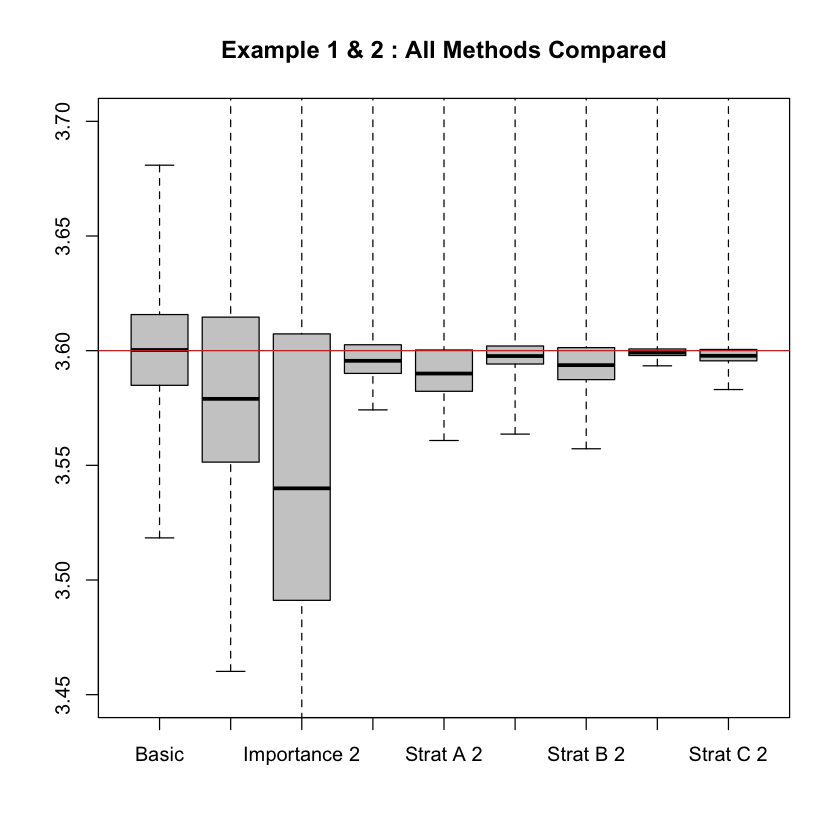

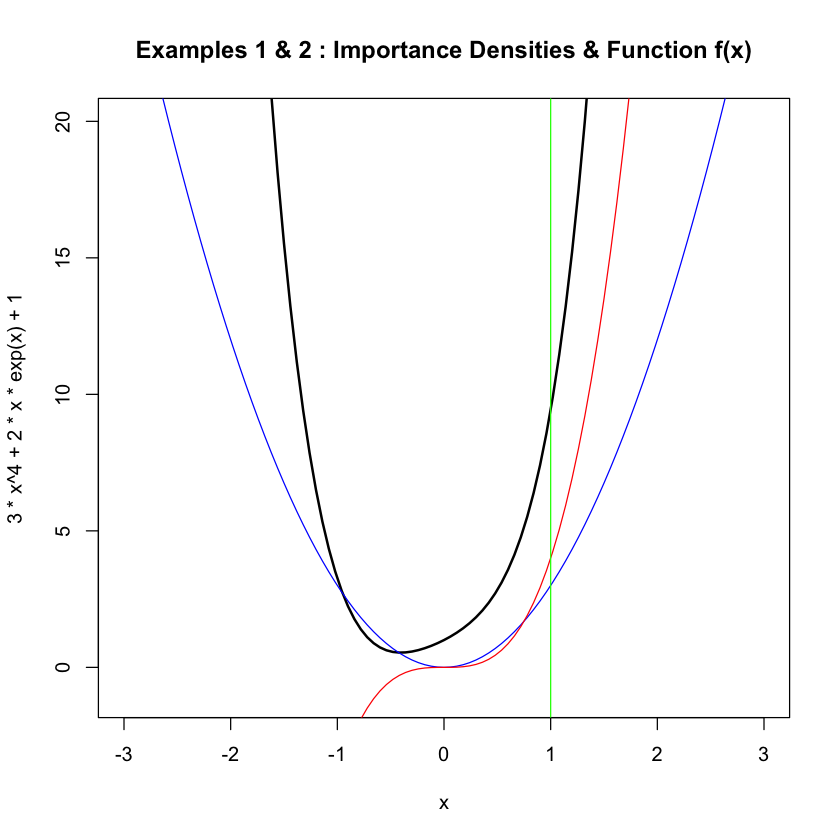

In [15]:
# After running all the above code, the following lines generate the comparative boxplot of all methods considered for both examples:

boxplot(res1_1, res2_1, res2_2, res3_1, res3_2, res4_1, res4_2, res5_1, res5_2, names=c("Basic", "Importance 1", "Importance 2", "Strat A 1", "Strat A 2", "Strat B 1", "Strat B 2", "Strat C 1", "Strat C 2"), ylim=c(3.45,3.7), col=grey(0.8), range=0, main = "Example 1 & 2 : All Methods Compared")
abline(h=3.6, col="red", lwd=1)

# And this generates all the functions in one graph:

curve(3*x^4 + 2*x*exp(x) + 1 , xlim=c(-3,3), ylim=c(-1,20), col="black", lwd=2, main="Examples 1 & 2 : Importance Densities & Function f(x)")	# f,  the function
curve(3*x^2, xlim=c(-3,3), ylim=c(-1,20), col="blue", add=T)	# first density
curve(4*x^3, xlim=c(-3,3), ylim=c(-1,20), col="red", add=T)						 # second density
abline(v=1, col="green")												